In [49]:
# Reading the Excel file
library(readxl)
Songs <- read_excel("SongsDB_Cleaned.xlsx")

# Rounding Dancability and adding it to our Songs Dataset
Round_Dance <- (round(Songs$Danceability*10))/10
Songs <- cbind(Songs,Round_Dance)
Songs
names(Songs)


[1] "Name"             "Danceability"     "Energy"           "Key"             
 [5] "Loudness"         "Mode"             "Speechness"       "Acousticness"    
 [9] "Instrumentalness" "Liveness"         "Valence"          "Tempo"           
[13] "Type"             "ID"               "Uri"              "Ref_Track"       
[17] "URL_features"     "Duration_ms"      "time_signature"   "Genre"           
[21] "Round_Dance"

In [50]:
#Exploring the dataset

Songs_tp <- unique(Songs$Genre)
Songs_tp
length(Songs_tp)
nrow(Songs)

Songs_Types <- unique(Songs$Type)
Songs_Types

Songs_TimeSig <- unique(Songs$time_signature)
Songs_TimeSig

[1] "celticmetal"                     "balkantrap"                     
  [3] "slovakrock"                      "deepchill-out"                  
  [5] "ghanaianhiphop"                  "e6fi"                           
  [7] "ostrock"                         "slovakindie"                    
  [9] "persiantraditional"              "albanianhiphop"                 
 [11] "modernblues"                     "canadianpop"                    
 [13] "portuguesefolk"                  "belgianpop"                     
 [15] "runefolk"                        "psychill"                       
 [17] "deepcomedy"                      "lapop"                          
 [19] "balletclass"                     "khmer"                          
 [21] "groovemetal"                     "pianoblues"                     
 [23] "dronemetal"                      "dreampop"                       
 [25] "swedishindiepop"                 "undergroundpowerpop"            
 [27] "sungpoetry"                      "mexicanrock-and-roll"           
 [29] "minimaldub"                      "belgianmetal"                   
 [31] "raregroove"                      "newrave"                        
 [33] "japanesedeathmetal"              "arabichiphop"                   
 [35] "italianbaroque"                  "gothicmetal"                    
 [37] "worship"                         "undergroundlatinhiphop"         
 [39] "norwegianmetal"                  "dronefolk"                      
 [41] "zeuhl"                           "oratory"                        
 [43] "mathpop"                         "romanianfolk"                   
 [45] "sinhala"                         "deeplatinjazz"                  
 [47] "alternativeamericana"            "birminghamindie"                
 [49] "bostonmetal"                     "go-go"                          
 [51] "tropicalhouse"                   "spanishfolk"                    
 [53] "russianpunk"                     "canadianrock"                   
 [55] "country"                         "liverpoolindie"                 
 [57] "gabba"                           "substep"                        
 [59] "mandepop"                        "doo-wop"                        
 [61] "darktechno"                      "salsa"                          
 [63] "deepbrazilianpop"                "thaipop"                        
 [65] "torontoindie"                    "messianicpraise"                
 [67] "blues-rock"                      "psychedelicfolk"                
 [69] "deeppsychobilly"                 "reggaerock"                     
 [71] "elpasoindie"                     "germanhardcore"                 
 [73] "belfastindie"                    "hongkongindie"                  
 [75] "germanoi"                        "organicambient"                 
 [77] "scratch"                         "reading"                        
 [79] "beats"                           "ecuadorianindie"                
 [81] "v-pop"                           "keroncong"                      
 [83] "funkrock"                        "futurefunk"                     
 [85] "fluxwork"                        "alaskaindie"                    
 [87] "deepdeephouse"                   "essexindie"                     
 [89] "volksmusik"                      "nuelectro"                      
 [91] "psychedelictrance"               "jazzfusion"                     
 [93] "zapstep"                         "vaporpop"                       
 [95] "deepfilthstep"                   "minimaltechno"                  
 [97] "danishpoprock"                   "muzicacrestina"                 
 [99] "metalguitar"                     "hardglam"                       
[101] "africangospel"                   "dmvrap"                         
[103] "vintageradioshow"                "italianundergroundhiphop"       
[105] "arpaparaguaya"                   "finnishhiphop"                  
[107] "swedishsoul"                     "indonesianpoppunk"              
[109] 

[1] 625

[1] 130862

[1] "audio_features"

[1] 4 3 1 5 0

In [51]:
library(tidyverse)

# Using piplining for selecting the required columns  
S_Seg =  Songs %>% select(Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features)

# Removing duplicate rows
Songs_Seg <-S_Seg[!duplicated(S_Seg$Name),]

#Songs_Seg
nrow(Songs_Seg)

[1] 89373

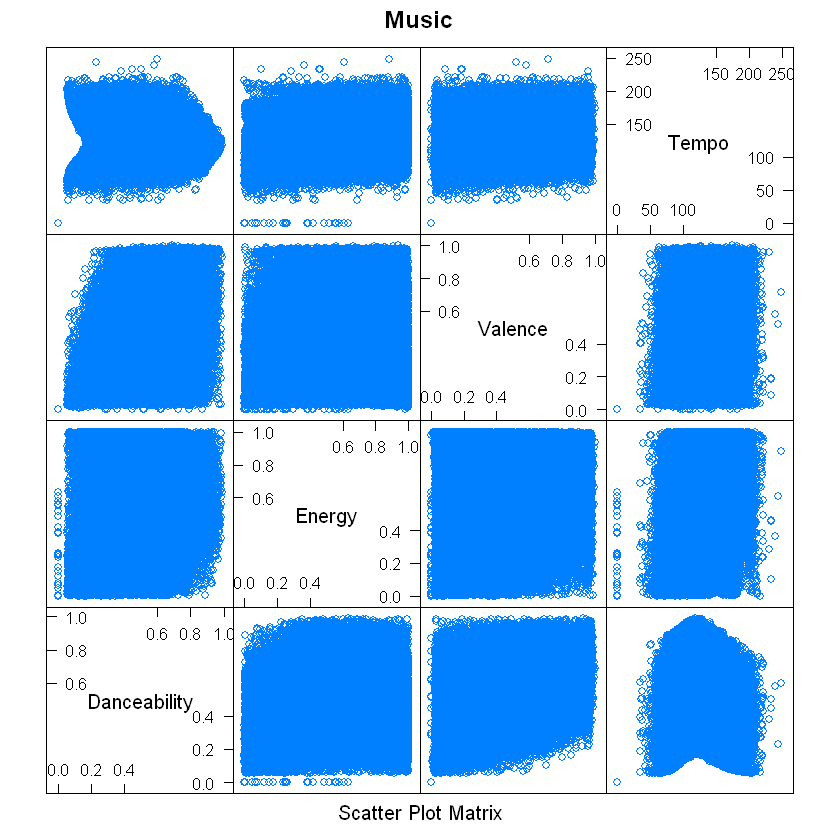

In [52]:
# Ploting matrix of graphs of Songs_Seg
library(lattice)
splom(Songs_Seg[c(3,4,5,6)],main="Music")

In [53]:
# To get summary of dataset Songs_Seg
summary(Songs_Seg)

     Name                ID             Danceability        Energy      
 Length:89373       Length:89373       Min.   :0.0000   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.4240   1st Qu.:0.4750  
 Mode  :character   Mode  :character   Median :0.5630   Median :0.6830  
                                       Mean   :0.5496   Mean   :0.6419  
                                       3rd Qu.:0.6920   3rd Qu.:0.8530  
                                       Max.   :0.9880   Max.   :1.0000  
    Valence           Tempo         Round_Dance        Genre          
 Min.   :0.0000   Min.   :  0.00   Min.   :0.0000   Length:89373      
 1st Qu.:0.2370   1st Qu.: 99.96   1st Qu.:0.4000   Class :character  
 Median :0.4530   Median :121.01   Median :0.6000   Mode  :character  
 Mean   :0.4648   Mean   :121.85   Mean   :0.5498                     
 3rd Qu.:0.6810   3rd Qu.:139.96   3rd Qu.:0.7000                     
 Max.   :1.0000   Max.   :248.07   Max.   :1.0000              

# Categories

In [54]:
#Creating category of Happy Songs
Happy <- Songs_Seg %>% filter(Danceability > 0.5, Energy > 0.5, Valence > 0.8, Tempo > 150)
Happy <- cbind(Happy,Category=c("Happy"))
Happy
nrow(Happy)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
Yarilo,7f7ONwL4HhXbzsRIZPHFPq,0.512,0.943,0.830,150.078,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/7f7ONwL4HhXbzsRIZPHFPq,Happy
Drink,5Hzto0vLxLb8GfkUtu6ZJK,0.509,0.855,0.804,160.051,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/5Hzto0vLxLb8GfkUtu6ZJK,Happy
MesadeSaloon,7y0Ma9fZI52tIaJVt8LeMa,0.571,0.949,0.952,156.291,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/7y0Ma9fZI52tIaJVt8LeMa,Happy
I\llTellMeMa!,1QQgj2zAP0dhu2dgoAWPmg,0.559,0.943,0.888,154.949,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/1QQgj2zAP0dhu2dgoAWPmg,Happy
Sera,3UfAvx014ml5laJ4UoF4dz,0.635,0.521,0.840,153.769,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/3UfAvx014ml5laJ4UoF4dz,Happy
Doktore,6rS4HWM4icmu6pxcj7UbCN,0.577,0.886,0.958,195.644,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/6rS4HWM4icmu6pxcj7UbCN,Happy
LaMiami,7Ehp3q9GW9ebK7iL6G1yqD,0.678,0.994,0.960,167.955,0.7,balkantrap,https://api.spotify.com/v1/audio-analysis/7Ehp3q9GW9ebK7iL6G1yqD,Happy
GluvoDoba,5ZnsCqmgycdbwY5hyaeJUE,0.505,0.891,0.904,180.075,0.5,balkantrap,https://api.spotify.com/v1/audio-analysis/5ZnsCqmgycdbwY5hyaeJUE,Happy
Gdesi,5f3dKMePHgMSaCEW2eOvyR,0.576,0.943,0.892,152.973,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/5f3dKMePHgMSaCEW2eOvyR,Happy
Virus,0NMLXByk5lfUhDHIagRPQ0,0.658,0.919,0.919,170.021,0.7,balkantrap,https://api.spotify.com/v1/audio-analysis/0NMLXByk5lfUhDHIagRPQ0,Happy


[1] 1396

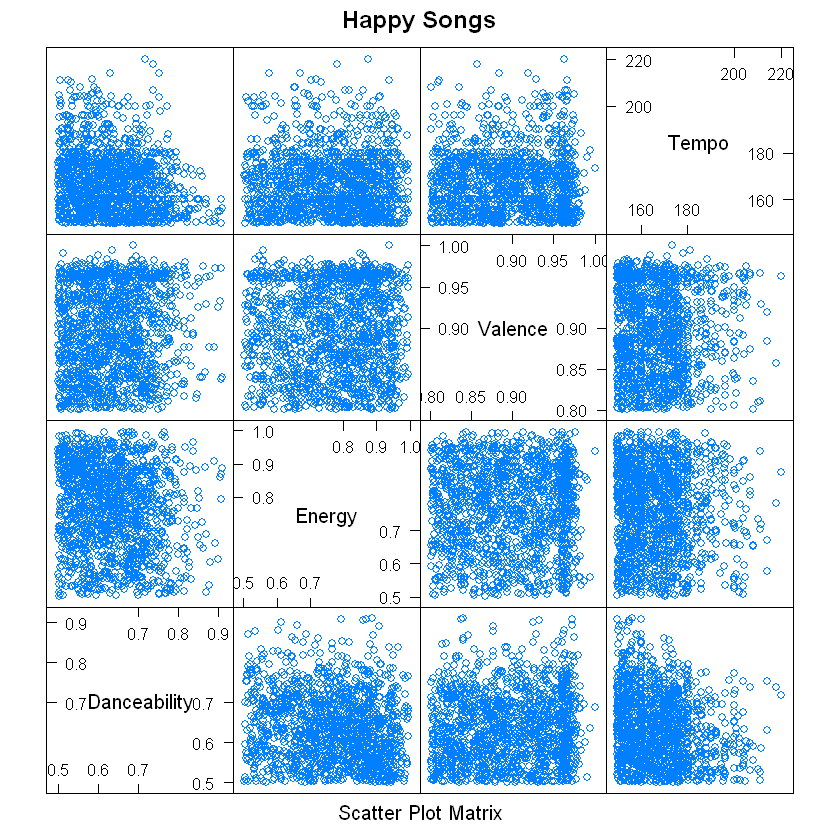

In [55]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Happy[c(3,4,5,6)],color=Happy$Genre,main="Happy Songs")

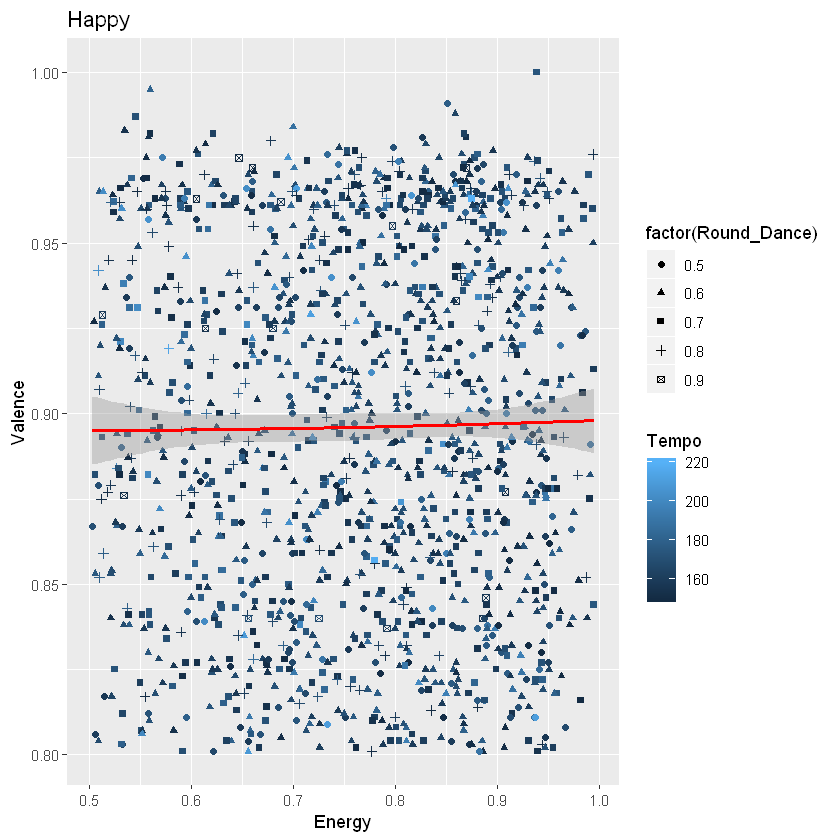

In [56]:
# To see the co-relation between attributes
p<- ggplot(data=Happy) +
geom_point(aes(x=Energy,y=Valence,shape=factor(Round_Dance),color=Tempo))
p+ ggtitle("Happy") + xlab("Energy") + ylab("Valence")+ geom_smooth(aes(Energy,Valence),method="lm",formula = y ~poly(x,2),color = "red")

In [57]:
#Creating category of Sad Songs
Sad <- Songs_Seg %>% filter(Danceability < 0.4, Energy < 0.5, Valence < 0.5, Tempo <125)
Sad <- cbind(Sad, Category=c("Sad"))
Sad
nrow(Sad)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
Sacrapos-AtFirstGlance,18i5kbgM7ndRBibn761gqm,0.170,0.1800,0.0299,117.302,0.2,celticmetal,https://api.spotify.com/v1/audio-analysis/18i5kbgM7ndRBibn761gqm,Sad
Otherworld,33NjRocIkquRnSw5L2Tjx9,0.195,0.2600,0.0396,92.917,0.2,celticmetal,https://api.spotify.com/v1/audio-analysis/33NjRocIkquRnSw5L2Tjx9,Sad
ScorchedEarth,7u17fkgfh4O7EAINoGTnis,0.150,0.3100,0.2060,82.105,0.2,celticmetal,https://api.spotify.com/v1/audio-analysis/7u17fkgfh4O7EAINoGTnis,Sad
W.H.Bonney,5ikiUdNDU0EuywjrWoXEvM,0.385,0.4160,0.1470,110.131,0.4,celticmetal,https://api.spotify.com/v1/audio-analysis/5ikiUdNDU0EuywjrWoXEvM,Sad
UpIsDown,5eZiC96lRq6IPHEOnbw0KS,0.276,0.4340,0.1140,96.647,0.3,celticmetal,https://api.spotify.com/v1/audio-analysis/5eZiC96lRq6IPHEOnbw0KS,Sad
DrinkUpMeHeartiesYoHo,0HewdQ1l9bckQXPfIO3CYH,0.126,0.4440,0.1610,67.437,0.1,celticmetal,https://api.spotify.com/v1/audio-analysis/0HewdQ1l9bckQXPfIO3CYH,Sad
BreakingIn,5iags20FYK5jUVPuhxKMe7,0.177,0.4250,0.0920,74.779,0.2,celticmetal,https://api.spotify.com/v1/audio-analysis/5iags20FYK5jUVPuhxKMe7,Sad
TheBornKing,1xaoC6L7jJQOR2ommqOlMt,0.356,0.1990,0.0686,109.844,0.4,celticmetal,https://api.spotify.com/v1/audio-analysis/1xaoC6L7jJQOR2ommqOlMt,Sad
HowtheTideRushesIn,6zdbNKL5uQM1pjxJc3AKTp,0.223,0.1380,0.2570,76.755,0.2,celticmetal,https://api.spotify.com/v1/audio-analysis/6zdbNKL5uQM1pjxJc3AKTp,Sad
Svitjod,3HOQ4g1uZIWY6Oix2uy9Iy,0.399,0.0569,0.1510,80.033,0.4,celticmetal,https://api.spotify.com/v1/audio-analysis/3HOQ4g1uZIWY6Oix2uy9Iy,Sad


[1] 4898

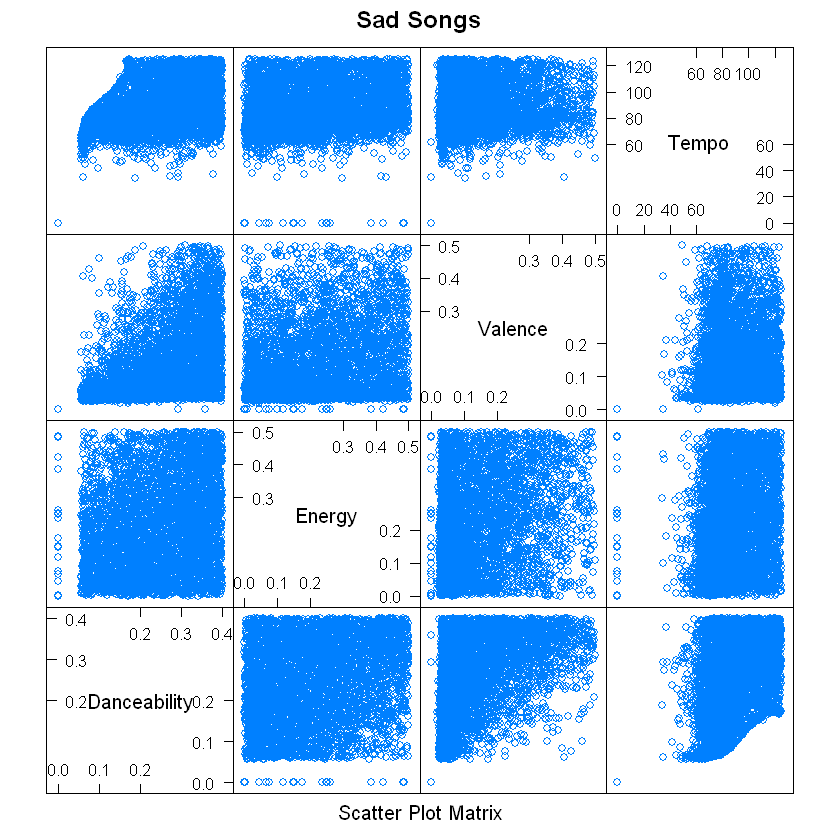

In [58]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Sad[c(3,4,5,6)],color=Sad$Genre,main="Sad Songs")

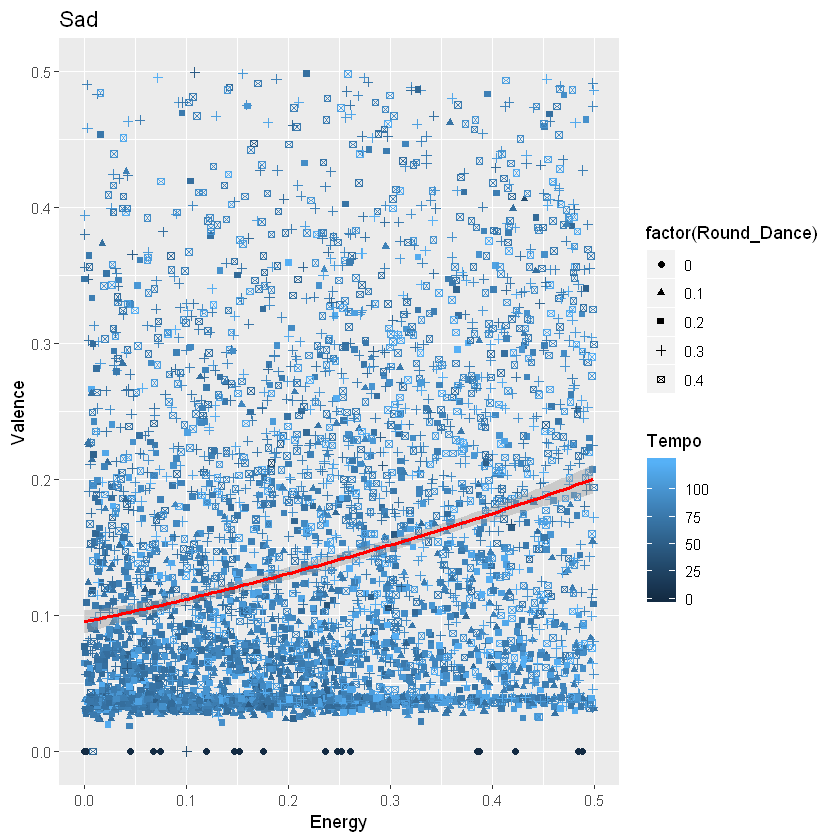

In [59]:
# To see the co-relation between attributes
p<- ggplot(data=Sad) +
geom_point(aes(x=Energy,y=Valence,shape=factor(Round_Dance),color=Tempo))
p+ ggtitle("Sad") + xlab("Energy") + ylab("Valence")+ geom_smooth(aes(Energy,Valence),method="lm",formula = y ~poly(x,2),color = "red")

In [60]:
#Creating category of Depression Songs
Depression <- Songs_Seg %>% filter(Danceability < 0.2, Energy < 0.2, Valence < 0.2, Tempo < 90)
Depression <- cbind(Depression, Category=c("Depression"))
Depression
nrow(Depression)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
CrossingaCelestialChasm,1diiy0M5KMqpTkE6la9LLp,0.1610,0.13000,0.0398,68.697,0.2,deepchill-out,https://api.spotify.com/v1/audio-analysis/1diiy0M5KMqpTkE6la9LLp,Depression
RingsofSaturn,3kLs5zaXghJkwrzltWxHbC,0.1980,0.19400,0.0332,67.677,0.2,deepchill-out,https://api.spotify.com/v1/audio-analysis/3kLs5zaXghJkwrzltWxHbC,Depression
TheCassiniDivision,4SFIvlHsSyzaxpVfQVFcNR,0.1950,0.19900,0.0386,74.709,0.2,deepchill-out,https://api.spotify.com/v1/audio-analysis/4SFIvlHsSyzaxpVfQVFcNR,Depression
TheEnckeGap,5liKvZ1sqvX7qXB2vfpjGm,0.1130,0.11500,0.0376,63.113,0.1,deepchill-out,https://api.spotify.com/v1/audio-analysis/5liKvZ1sqvX7qXB2vfpjGm,Depression
CoursetoCanisMajor,1Q3CE06EcoBmbS1U4bZi1d,0.0858,0.07570,0.1050,73.753,0.1,deepchill-out,https://api.spotify.com/v1/audio-analysis/1Q3CE06EcoBmbS1U4bZi1d,Depression
ApproachingSirius,5xejEOZPuDOE9POMaFjh0y,0.1380,0.12300,0.0338,64.466,0.1,deepchill-out,https://api.spotify.com/v1/audio-analysis/5xejEOZPuDOE9POMaFjh0y,Depression
TheVoid,3xeNwIG4ZYVdnUEKoOX16p,0.1660,0.08820,0.0375,89.590,0.2,deepchill-out,https://api.spotify.com/v1/audio-analysis/3xeNwIG4ZYVdnUEKoOX16p,Depression
PendingSupernova,5unMRyE011oiM7nEF8kIqa,0.1590,0.11600,0.0645,74.684,0.2,deepchill-out,https://api.spotify.com/v1/audio-analysis/5unMRyE011oiM7nEF8kIqa,Depression
MagnificentDesolation,1UOIdioIU2C4efp9y4JR5w,0.1730,0.19300,0.0336,66.009,0.2,deepchill-out,https://api.spotify.com/v1/audio-analysis/1UOIdioIU2C4efp9y4JR5w,Depression
TheFurthestReachesofTycho,1rEnJwDdyHupgMLXrS0P61,0.1380,0.12100,0.0371,72.362,0.1,deepchill-out,https://api.spotify.com/v1/audio-analysis/1rEnJwDdyHupgMLXrS0P61,Depression


[1] 852

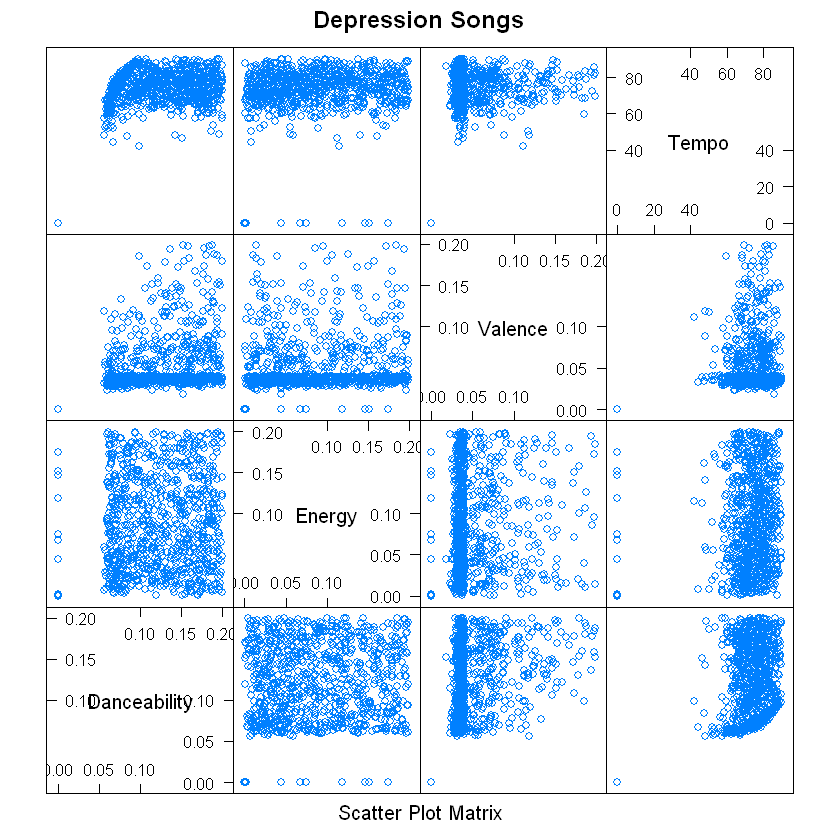

In [61]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Depression[c(3,4,5,6)],main="Depression Songs")

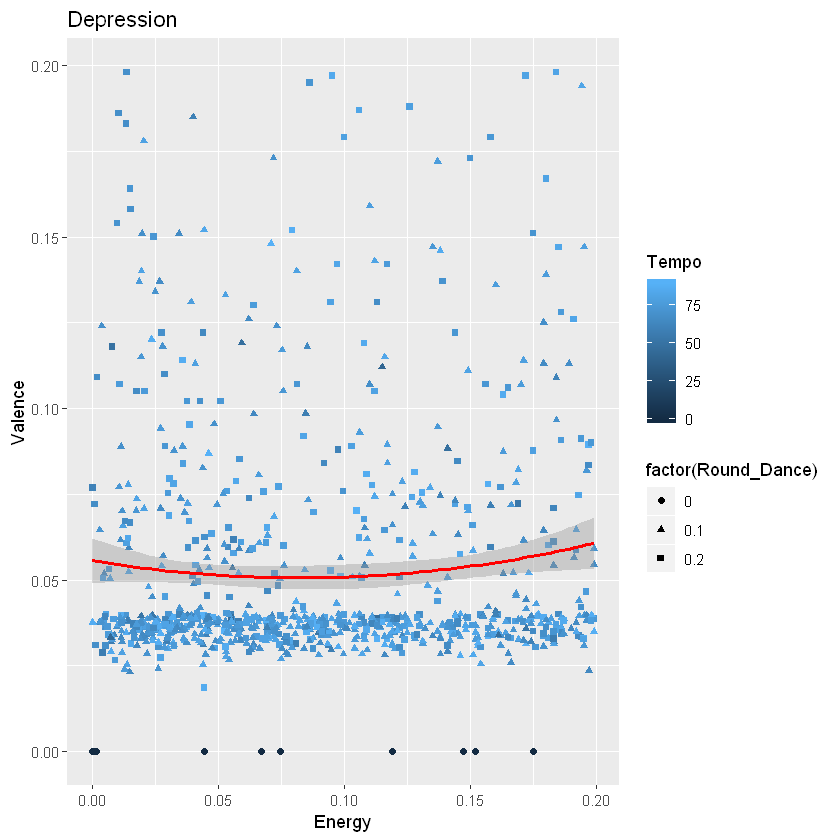

In [62]:
# To see the co-relation between attributes
p<- ggplot(data=Depression) +
geom_point(aes(x=Energy,y=Valence,shape=factor(Round_Dance),color=Tempo))
p+ ggtitle("Depression") + xlab("Energy") + ylab("Valence")+ geom_smooth(aes(Energy,Valence),method="lm",formula = y ~poly(x,2),color = "red")

In [63]:
#Creating category of Workout Songs
Workout <- Songs_Seg %>% filter(Danceability > 0.5,Energy > 0.8, Valence > 0.8, Tempo > 170)
Workout <- cbind(Workout, Category=c("Workout"))
Workout
nrow(Workout)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
Doktore,6rS4HWM4icmu6pxcj7UbCN,0.577,0.886,0.958,195.644,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/6rS4HWM4icmu6pxcj7UbCN,Workout
GluvoDoba,5ZnsCqmgycdbwY5hyaeJUE,0.505,0.891,0.904,180.075,0.5,balkantrap,https://api.spotify.com/v1/audio-analysis/5ZnsCqmgycdbwY5hyaeJUE,Workout
Virus,0NMLXByk5lfUhDHIagRPQ0,0.658,0.919,0.919,170.021,0.7,balkantrap,https://api.spotify.com/v1/audio-analysis/0NMLXByk5lfUhDHIagRPQ0,Workout
OnaMeJeRazbila,5JOV5hQcW42VhX7eka41g3,0.550,0.954,0.859,180.038,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/5JOV5hQcW42VhX7eka41g3,Workout
NikdyNicNebylo,3rKPRnYJ5b89bv5ZsLrogK,0.730,0.840,0.952,189.282,0.7,slovakrock,https://api.spotify.com/v1/audio-analysis/3rKPRnYJ5b89bv5ZsLrogK,Workout
KazooOrDie,2HvIzz5gzqsy5A71z60wWG,0.528,0.887,0.816,186.015,0.5,slovakrock,https://api.spotify.com/v1/audio-analysis/2HvIzz5gzqsy5A71z60wWG,Workout
EverySingleNight-RadioEdit,0oKZszqUM9wrqf16tejcUS,0.626,0.811,0.808,181.459,0.6,deepchill-out,https://api.spotify.com/v1/audio-analysis/0oKZszqUM9wrqf16tejcUS,Workout
Eisdame,3ecEPyd3YbGgzaNi3yx2Fg,0.634,0.911,0.966,204.077,0.6,ostrock,https://api.spotify.com/v1/audio-analysis/3ecEPyd3YbGgzaNi3yx2Fg,Workout
Sternenhimmel,79hX0z70ufkP63Ocr4Jz4K,0.526,0.819,0.944,190.517,0.5,ostrock,https://api.spotify.com/v1/audio-analysis/79hX0z70ufkP63Ocr4Jz4K,Workout
BABASTARS-HIGH[AudioHQ],5cQR7SHzKPGCjxUeIrOzs8,0.656,0.910,0.868,170.031,0.7,albanianhiphop,https://api.spotify.com/v1/audio-analysis/5cQR7SHzKPGCjxUeIrOzs8,Workout


[1] 247

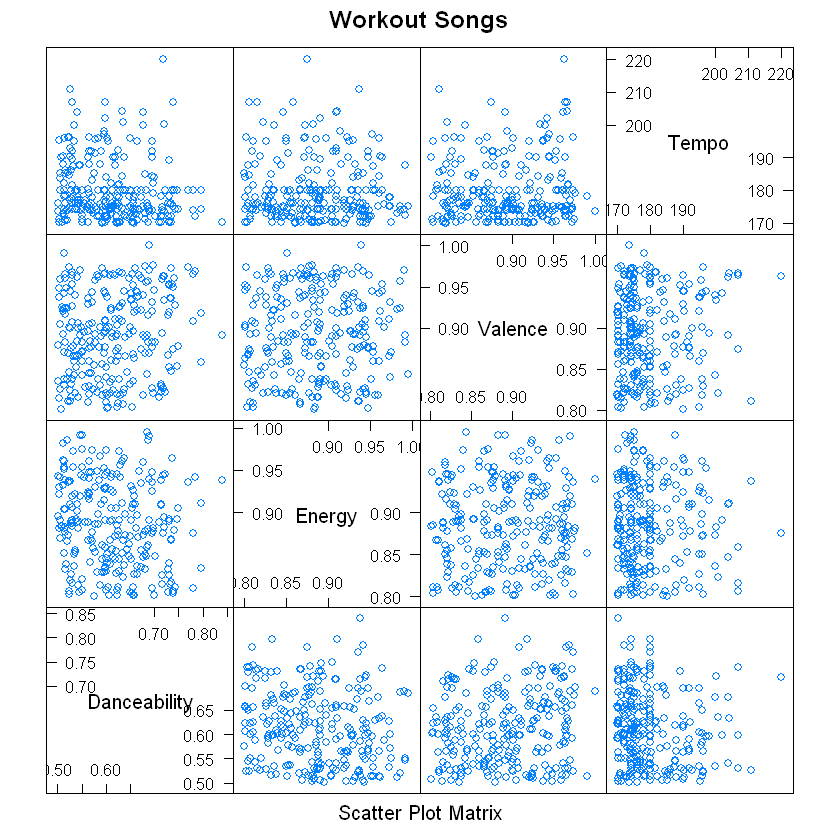

In [64]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Workout[c(3,4,5,6)],main="Workout Songs")

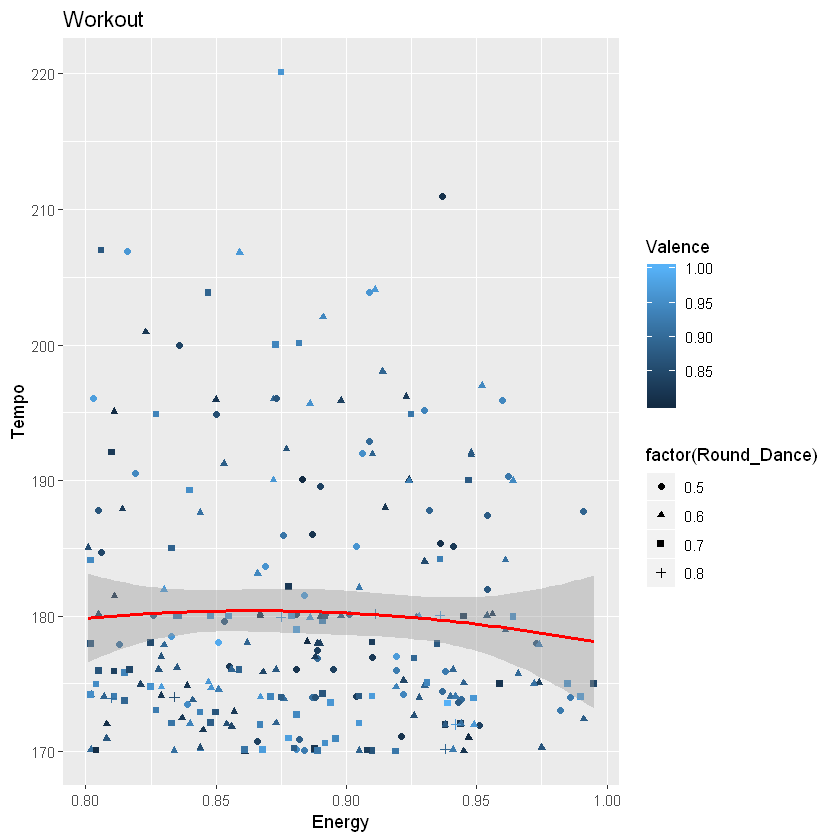

In [65]:
# To see the co-relation between attributes
p<- ggplot(data=Workout) +
geom_point(aes(x=Energy,y=Tempo,shape=factor(Round_Dance),color=Valence))
p+ ggtitle("Workout") + xlab("Energy") + ylab("Tempo")+ geom_smooth(aes(Energy,Tempo),method="lm",formula = y ~poly(x,2),color = "red")

In [66]:
#Creating category of Energetic Songs
Energetic <- Songs_Seg %>% filter(Danceability > 0.5, Energy > 0.8, Valence > 0.6, Tempo > 130)
Energetic <- cbind(Energetic, Category=c("Energetic"))
Energetic
nrow(Energetic)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
Kjettarenmotstr<U+E60D>men,2wJj7JwUMyppNOpyjfnFUR,0.538,0.938,0.744,135.081,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/2wJj7JwUMyppNOpyjfnFUR,Energetic
IfItBleedsWeCanKillIt,3BsT7xB5kUsCDrmkBvkYVF,0.560,0.897,0.626,140.004,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/3BsT7xB5kUsCDrmkBvkYVF,Energetic
IevanPolkka,5Ua7FnzpePVpZtl9AIYrRT,0.534,0.972,0.943,130.023,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/5Ua7FnzpePVpZtl9AIYrRT,Energetic
AwakentheIron,3UK0i6wfLdEvkNAvuMGwnA,0.522,0.972,0.799,141.972,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/3UK0i6wfLdEvkNAvuMGwnA,Energetic
Yarilo,7f7ONwL4HhXbzsRIZPHFPq,0.512,0.943,0.830,150.078,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/7f7ONwL4HhXbzsRIZPHFPq,Energetic
Drink,5Hzto0vLxLb8GfkUtu6ZJK,0.509,0.855,0.804,160.051,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/5Hzto0vLxLb8GfkUtu6ZJK,Energetic
BarrelsofWhiskey,3b8arlkmuJs5xCpZQ9NxHB,0.651,0.939,0.824,133.006,0.7,celticmetal,https://api.spotify.com/v1/audio-analysis/3b8arlkmuJs5xCpZQ9NxHB,Energetic
ElaRoubouMeuCaminh<U+7E0A>,2dwuXlDHmgkeqbIVTVcjjl,0.552,0.940,0.931,149.332,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/2dwuXlDHmgkeqbIVTVcjjl,Energetic
MesadeSaloon,7y0Ma9fZI52tIaJVt8LeMa,0.571,0.949,0.952,156.291,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/7y0Ma9fZI52tIaJVt8LeMa,Energetic
WelcometotheJungle,20ncqYNaYnnrMuTnQenpuH,0.611,0.812,0.799,136.120,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/20ncqYNaYnnrMuTnQenpuH,Energetic


[1] 2810

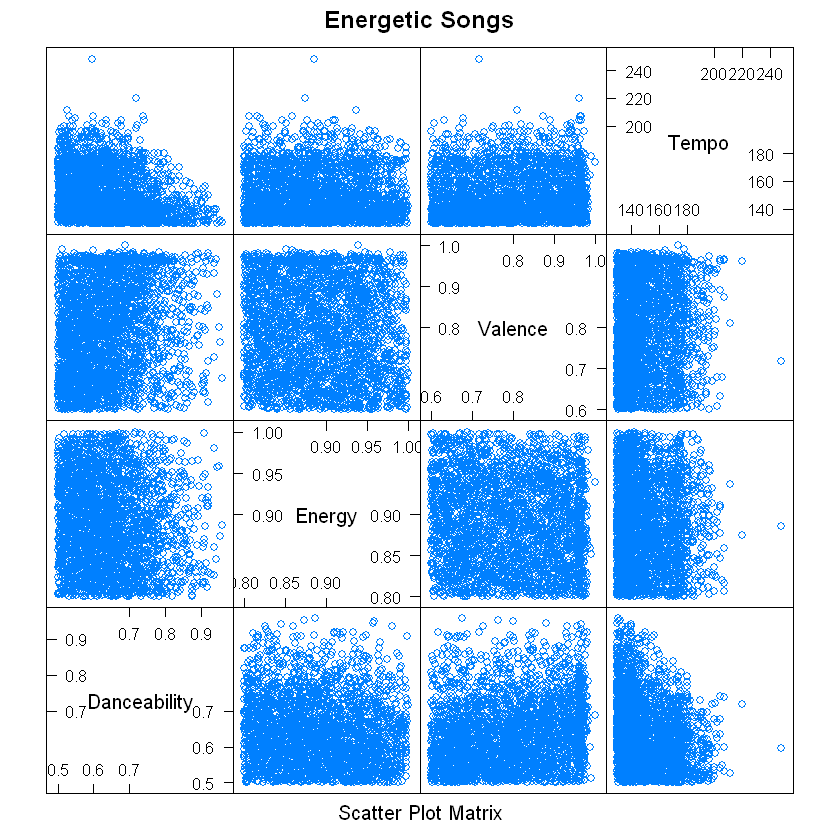

In [67]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Energetic[c(3,4,5,6)],main="Energetic Songs")

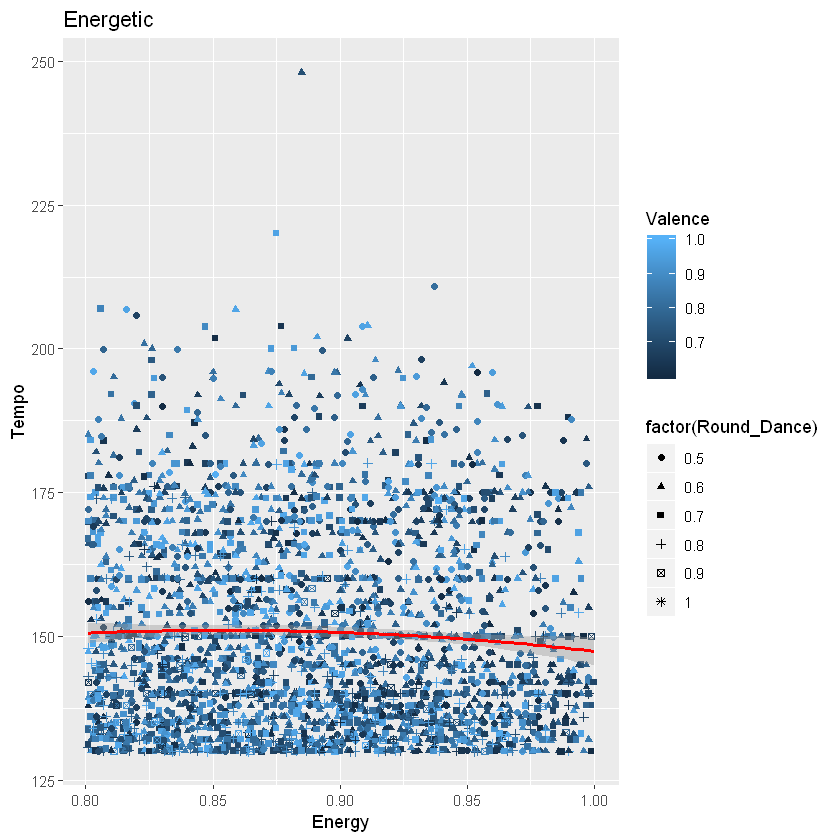

In [68]:
# To see the co-relation between attributes
p<- ggplot(data=Energetic) +
geom_point(aes(x=Energy,y=Tempo,shape=factor(Round_Dance),color=Valence))
p+ ggtitle("Energetic") + xlab("Energy") + ylab("Tempo")+ geom_smooth(aes(Energy,Tempo),method="lm",formula = y ~poly(x,2),color = "red")

In [69]:
#Creating category of Clam Songs
Calm <- Songs_Seg %>% filter(Danceability < 0.475, Energy < 0.3, Valence > 0.2, Tempo < 80)
Calm <- cbind(Calm, Category=c("Calm"))
Calm
nrow(Calm)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
HowtheTideRushesIn,6zdbNKL5uQM1pjxJc3AKTp,0.223,0.1380,0.257,76.755,0.2,celticmetal,https://api.spotify.com/v1/audio-analysis/6zdbNKL5uQM1pjxJc3AKTp,Calm
RondeauinCMinor(Instrumental),2Tl3JgN2EfTOaPPZ3D3f8R,0.446,0.2050,0.541,75.074,0.4,celticmetal,https://api.spotify.com/v1/audio-analysis/2Tl3JgN2EfTOaPPZ3D3f8R,Calm
Bahara,19NlDIDvxqztTf1YaLV8sc,0.430,0.2370,0.381,79.884,0.4,persiantraditional,https://api.spotify.com/v1/audio-analysis/19NlDIDvxqztTf1YaLV8sc,Calm
SazIV,5GOTxz6GwX1jklZ0YQVY9U,0.431,0.2650,0.435,73.633,0.4,persiantraditional,https://api.spotify.com/v1/audio-analysis/5GOTxz6GwX1jklZ0YQVY9U,Calm
SazVI,08wwj0mCnZIf99X69B062w,0.445,0.1780,0.451,63.839,0.4,persiantraditional,https://api.spotify.com/v1/audio-analysis/08wwj0mCnZIf99X69B062w,Calm
Avaz-eBayat-eEsfahan,3bixplOhjKCPx5AkAXwC1Y,0.374,0.1950,0.232,78.813,0.4,persiantraditional,https://api.spotify.com/v1/audio-analysis/3bixplOhjKCPx5AkAXwC1Y,Calm
ManBiMey<U+8C8C>N<U+7A08>ZistanNatv<U+7A57>am(feat.Mohammad-RezaShajarian&FereydunShahbazian),27F5Jflsk7wgd5bV8GCc0c,0.467,0.1380,0.535,61.728,0.5,persiantraditional,https://api.spotify.com/v1/audio-analysis/27F5Jflsk7wgd5bV8GCc0c,Calm
Y<U+7A69><U+7A57>BeMor<U+7A20>eqatChoDid<U+7A69>Konid(feat.Mohammad-RezaShajarian&FereydunShahbazian),2us30XHG70oxxQWT146liq,0.291,0.0337,0.203,49.793,0.3,persiantraditional,https://api.spotify.com/v1/audio-analysis/2us30XHG70oxxQWT146liq,Calm
AshkeMahtab,6D74QkzVL9jJbPhD1rIq5l,0.201,0.1200,0.267,75.808,0.2,persiantraditional,https://api.spotify.com/v1/audio-analysis/6D74QkzVL9jJbPhD1rIq5l,Calm
Rain-(LyricsByAliMo\allem),4lGbo8z2fGdxtfTvsKO8zf,0.358,0.2100,0.247,76.774,0.4,persiantraditional,https://api.spotify.com/v1/audio-analysis/4lGbo8z2fGdxtfTvsKO8zf,Calm


[1] 395

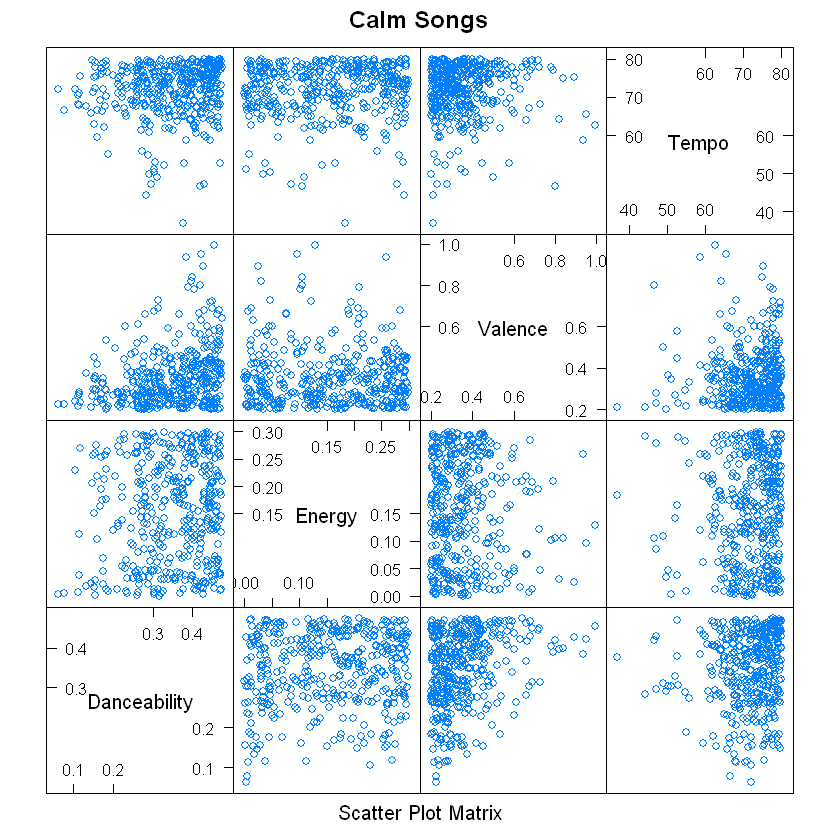

In [70]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Calm[c(3,4,5,6)],main="Calm Songs")

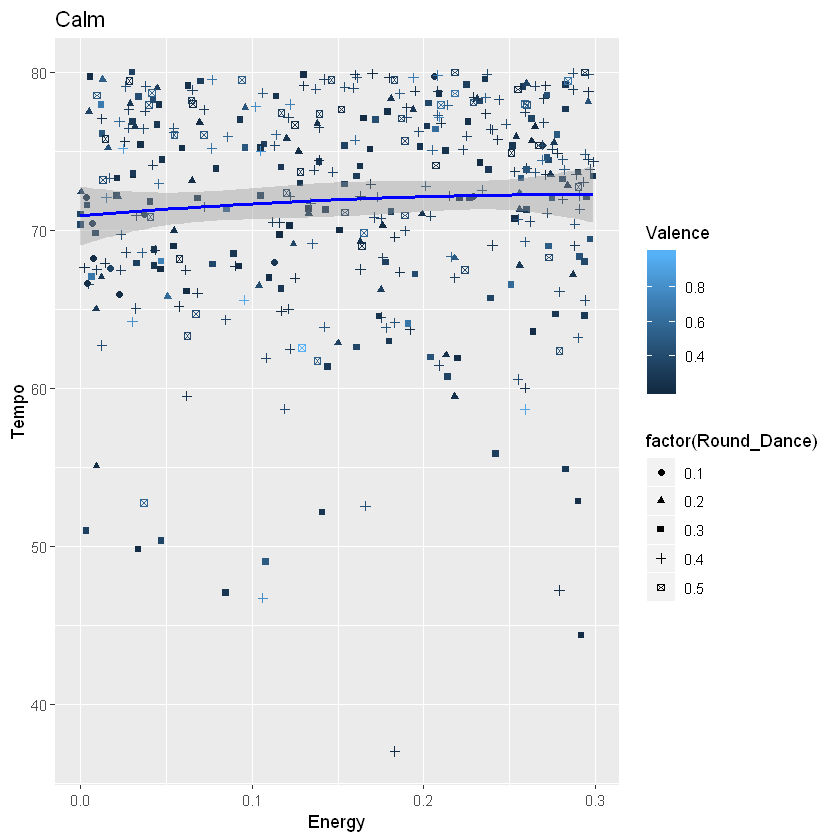

In [71]:
# To see the co-relation between attributes
p<- ggplot(data=Calm) +
geom_point(aes(x=Energy,y=Tempo,shape=factor(Round_Dance),color=Valence))
p+ ggtitle("Calm") + xlab("Energy") + ylab("Tempo")+ geom_smooth(aes(Energy,Tempo),method="lm",formula = y ~poly(x,2),color = "blue")

In [72]:
#Creating category of Frantic Songs
Frantic <- Songs_Seg %>% filter(Danceability > 0, Energy > 0.8, Valence > 0.5, Tempo > 130)
Frantic <- cbind(Frantic, Category=c("Frantic"))
Frantic
nrow(Frantic)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
TheLionFromtheNorth,734y7nJZ0cPOACIoT9kWyV,0.492,0.954,0.643,152.987,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/734y7nJZ0cPOACIoT9kWyV,Frantic
Kjettarenmotstr<U+E60D>men,2wJj7JwUMyppNOpyjfnFUR,0.538,0.938,0.744,135.081,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/2wJj7JwUMyppNOpyjfnFUR,Frantic
EspenBinAskeladden,3eg1DWDuR5J4IgZuNtaU9h,0.345,0.908,0.514,134.809,0.3,celticmetal,https://api.spotify.com/v1/audio-analysis/3eg1DWDuR5J4IgZuNtaU9h,Frantic
Epona,6dtGNp1M5FFLhjejpGawV4,0.493,0.946,0.518,144.972,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/6dtGNp1M5FFLhjejpGawV4,Frantic
IfItBleedsWeCanKillIt,3BsT7xB5kUsCDrmkBvkYVF,0.560,0.897,0.626,140.004,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/3BsT7xB5kUsCDrmkBvkYVF,Frantic
Scyth,6z35Tv7O0zcdnwtPfNHW2z,0.388,0.900,0.558,187.036,0.4,celticmetal,https://api.spotify.com/v1/audio-analysis/6z35Tv7O0zcdnwtPfNHW2z,Frantic
ZombieDance,3o86HNaujiaZFlTuwWuVw8,0.534,0.963,0.527,150.048,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/3o86HNaujiaZFlTuwWuVw8,Frantic
TimeandEternity,4haUMRXbvaQpXlh8HT6LHM,0.262,0.878,0.571,180.046,0.3,celticmetal,https://api.spotify.com/v1/audio-analysis/4haUMRXbvaQpXlh8HT6LHM,Frantic
Morrigane\sFury,0e4jiZ6p6VzM4xjgGWXhJm,0.475,0.982,0.618,154.998,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/0e4jiZ6p6VzM4xjgGWXhJm,Frantic
TheFirstandtheLast,2xKM2KJWd06BMnZ21WhhpT,0.500,0.928,0.619,141.967,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/2xKM2KJWd06BMnZ21WhhpT,Frantic


[1] 6000

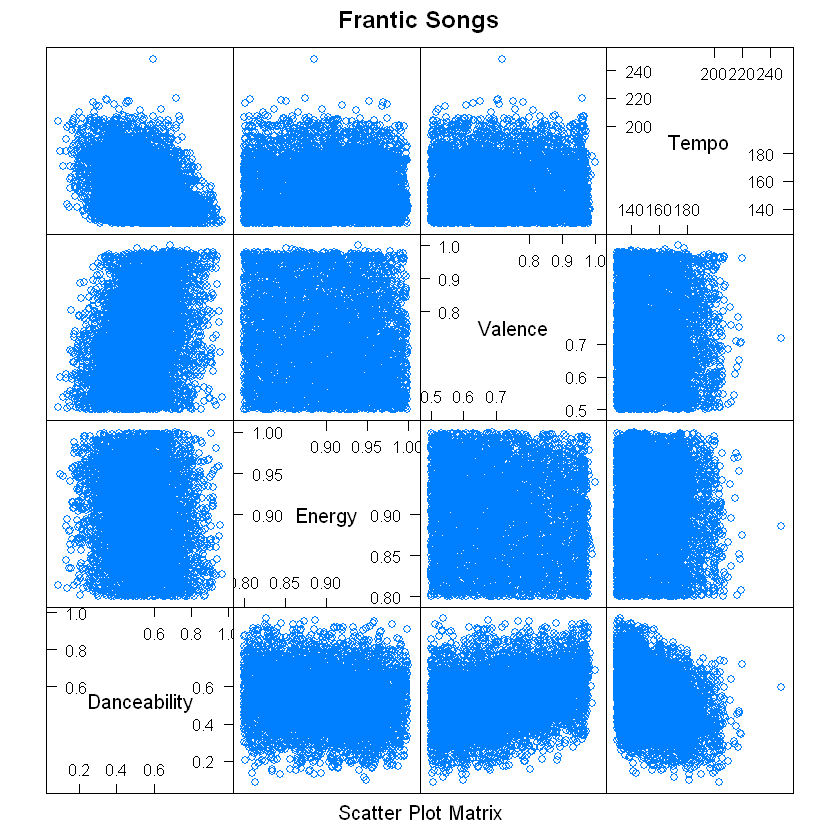

In [73]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Frantic[c(3,4,5,6)],main="Frantic Songs")

Warning message:
"Using alpha for a discrete variable is not advised."

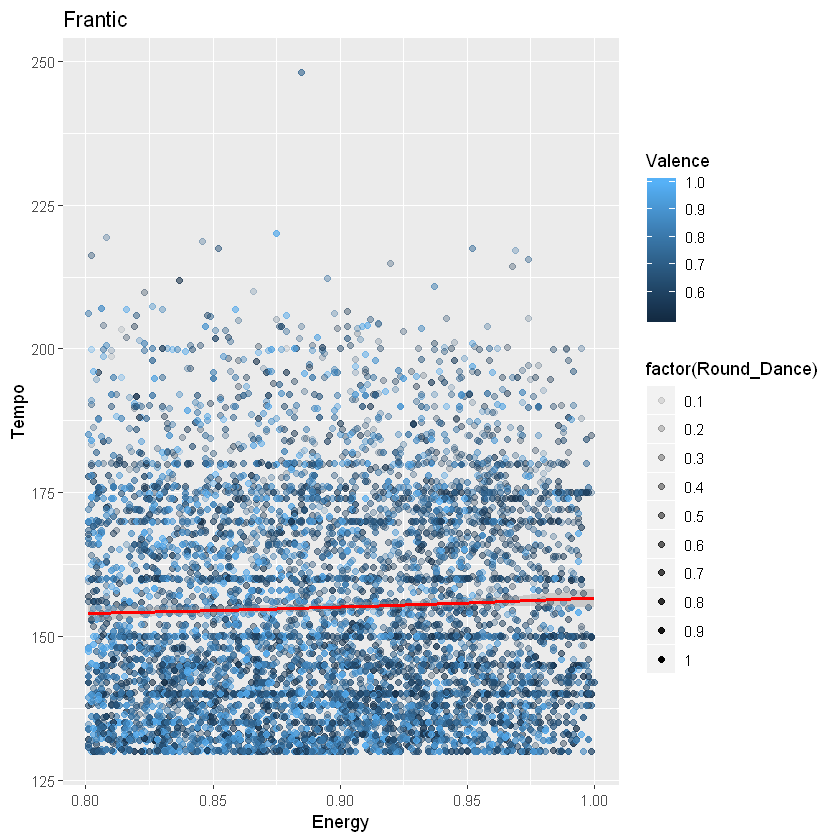

In [74]:
# To see the co-relation between attributes
p<- ggplot(data=Frantic) +
geom_point(aes(x=Energy,y=Tempo,alpha=factor(Round_Dance),color=Valence))
p+ ggtitle("Frantic") + xlab("Energy") + ylab("Tempo")+ geom_smooth(aes(Energy,Tempo),method="lm",formula = y ~poly(x,2),  color = "red")

In [75]:
#Creating category of Gaming Songs
Gaming  <- Songs_Seg %>% filter(Danceability > 0.2, Energy > 0.8, Valence > 0.5, Tempo > 125)
Gaming <- cbind(Gaming, Category=c("Gaming"))
Gaming
nrow(Gaming)


Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
TheLionFromtheNorth,734y7nJZ0cPOACIoT9kWyV,0.492,0.954,0.643,152.987,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/734y7nJZ0cPOACIoT9kWyV,Gaming
Kjettarenmotstr<U+E60D>men,2wJj7JwUMyppNOpyjfnFUR,0.538,0.938,0.744,135.081,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/2wJj7JwUMyppNOpyjfnFUR,Gaming
Mexico,30HudkdtT6bvHdagrxFJ7e,0.574,0.958,0.855,127.998,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/30HudkdtT6bvHdagrxFJ7e,Gaming
EspenBinAskeladden,3eg1DWDuR5J4IgZuNtaU9h,0.345,0.908,0.514,134.809,0.3,celticmetal,https://api.spotify.com/v1/audio-analysis/3eg1DWDuR5J4IgZuNtaU9h,Gaming
Epona,6dtGNp1M5FFLhjejpGawV4,0.493,0.946,0.518,144.972,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/6dtGNp1M5FFLhjejpGawV4,Gaming
IfItBleedsWeCanKillIt,3BsT7xB5kUsCDrmkBvkYVF,0.560,0.897,0.626,140.004,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/3BsT7xB5kUsCDrmkBvkYVF,Gaming
Scyth,6z35Tv7O0zcdnwtPfNHW2z,0.388,0.900,0.558,187.036,0.4,celticmetal,https://api.spotify.com/v1/audio-analysis/6z35Tv7O0zcdnwtPfNHW2z,Gaming
ZombieDance,3o86HNaujiaZFlTuwWuVw8,0.534,0.963,0.527,150.048,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/3o86HNaujiaZFlTuwWuVw8,Gaming
Kotikonnut,0E8ij09wnUrRa8hs0DpIle,0.608,0.945,0.546,128.060,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/0E8ij09wnUrRa8hs0DpIle,Gaming
TimeandEternity,4haUMRXbvaQpXlh8HT6LHM,0.262,0.878,0.571,180.046,0.3,celticmetal,https://api.spotify.com/v1/audio-analysis/4haUMRXbvaQpXlh8HT6LHM,Gaming


[1] 7305

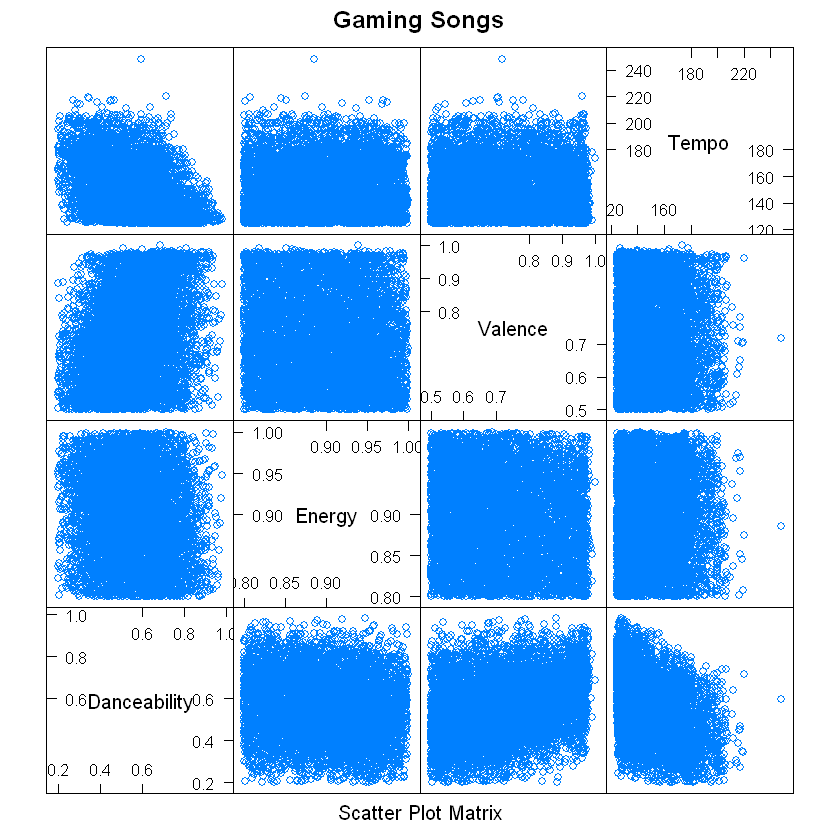

In [76]:
# To see the outliers and making a conclusions 
library(lattice)
splom(Gaming[c(3,4,5,6)],main="Gaming Songs")

Warning message:
"Using alpha for a discrete variable is not advised."

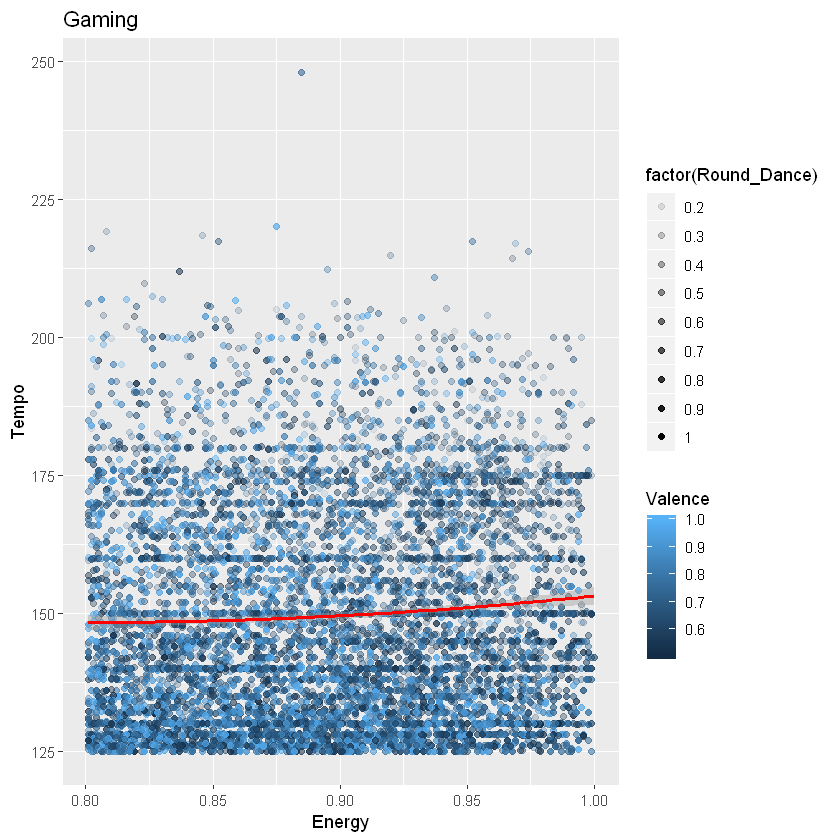

In [77]:
# To see the co-relation between attributes
p<- ggplot(data=Gaming) +
geom_point(aes(x=Energy,y=Tempo,alpha=factor(Round_Dance),color=Valence))
p+ ggtitle("Gaming") + xlab("Energy") + ylab("Tempo")+ geom_smooth(aes(Energy,Tempo),method="lm",formula = y ~poly(x,2),color = "Red")

In [78]:
# Making A single Dataset of all categories we have added
Final_DB <- rbind(Happy,Sad,Workout,Depression,Energetic,Calm,Frantic,Gaming)
Final_DB
nrow(Final_DB)

Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
Yarilo,7f7ONwL4HhXbzsRIZPHFPq,0.512,0.943,0.830,150.078,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/7f7ONwL4HhXbzsRIZPHFPq,Happy
Drink,5Hzto0vLxLb8GfkUtu6ZJK,0.509,0.855,0.804,160.051,0.5,celticmetal,https://api.spotify.com/v1/audio-analysis/5Hzto0vLxLb8GfkUtu6ZJK,Happy
MesadeSaloon,7y0Ma9fZI52tIaJVt8LeMa,0.571,0.949,0.952,156.291,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/7y0Ma9fZI52tIaJVt8LeMa,Happy
I\llTellMeMa!,1QQgj2zAP0dhu2dgoAWPmg,0.559,0.943,0.888,154.949,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/1QQgj2zAP0dhu2dgoAWPmg,Happy
Sera,3UfAvx014ml5laJ4UoF4dz,0.635,0.521,0.840,153.769,0.6,celticmetal,https://api.spotify.com/v1/audio-analysis/3UfAvx014ml5laJ4UoF4dz,Happy
Doktore,6rS4HWM4icmu6pxcj7UbCN,0.577,0.886,0.958,195.644,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/6rS4HWM4icmu6pxcj7UbCN,Happy
LaMiami,7Ehp3q9GW9ebK7iL6G1yqD,0.678,0.994,0.960,167.955,0.7,balkantrap,https://api.spotify.com/v1/audio-analysis/7Ehp3q9GW9ebK7iL6G1yqD,Happy
GluvoDoba,5ZnsCqmgycdbwY5hyaeJUE,0.505,0.891,0.904,180.075,0.5,balkantrap,https://api.spotify.com/v1/audio-analysis/5ZnsCqmgycdbwY5hyaeJUE,Happy
Gdesi,5f3dKMePHgMSaCEW2eOvyR,0.576,0.943,0.892,152.973,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/5f3dKMePHgMSaCEW2eOvyR,Happy
Virus,0NMLXByk5lfUhDHIagRPQ0,0.658,0.919,0.919,170.021,0.7,balkantrap,https://api.spotify.com/v1/audio-analysis/0NMLXByk5lfUhDHIagRPQ0,Happy


[1] 23903

In [79]:
# Just checking duplicate rows
Duplicates <- Final_DB[duplicated(Final_DB$Name),]
Duplicates
nrow(Duplicates)

,Name,ID,Danceability,Energy,Valence,Tempo,Round_Dance,Genre,URL_features,Category
6295,Doktore,6rS4HWM4icmu6pxcj7UbCN,0.577,0.886,0.958,195.644,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/6rS4HWM4icmu6pxcj7UbCN,Workout
6296,GluvoDoba,5ZnsCqmgycdbwY5hyaeJUE,0.505,0.891,0.904,180.075,0.5,balkantrap,https://api.spotify.com/v1/audio-analysis/5ZnsCqmgycdbwY5hyaeJUE,Workout
6297,Virus,0NMLXByk5lfUhDHIagRPQ0,0.658,0.919,0.919,170.021,0.7,balkantrap,https://api.spotify.com/v1/audio-analysis/0NMLXByk5lfUhDHIagRPQ0,Workout
6298,OnaMeJeRazbila,5JOV5hQcW42VhX7eka41g3,0.550,0.954,0.859,180.038,0.6,balkantrap,https://api.spotify.com/v1/audio-analysis/5JOV5hQcW42VhX7eka41g3,Workout
6299,NikdyNicNebylo,3rKPRnYJ5b89bv5ZsLrogK,0.730,0.840,0.952,189.282,0.7,slovakrock,https://api.spotify.com/v1/audio-analysis/3rKPRnYJ5b89bv5ZsLrogK,Workout
6300,KazooOrDie,2HvIzz5gzqsy5A71z60wWG,0.528,0.887,0.816,186.015,0.5,slovakrock,https://api.spotify.com/v1/audio-analysis/2HvIzz5gzqsy5A71z60wWG,Workout
6301,EverySingleNight-RadioEdit,0oKZszqUM9wrqf16tejcUS,0.626,0.811,0.808,181.459,0.6,deepchill-out,https://api.spotify.com/v1/audio-analysis/0oKZszqUM9wrqf16tejcUS,Workout
6302,Eisdame,3ecEPyd3YbGgzaNi3yx2Fg,0.634,0.911,0.966,204.077,0.6,ostrock,https://api.spotify.com/v1/audio-analysis/3ecEPyd3YbGgzaNi3yx2Fg,Workout
6303,Sternenhimmel,79hX0z70ufkP63Ocr4Jz4K,0.526,0.819,0.944,190.517,0.5,ostrock,https://api.spotify.com/v1/audio-analysis/79hX0z70ufkP63Ocr4Jz4K,Workout
6304,BABASTARS-HIGH[AudioHQ],5cQR7SHzKPGCjxUeIrOzs8,0.656,0.910,0.868,170.031,0.7,albanianhiphop,https://api.spotify.com/v1/audio-analysis/5cQR7SHzKPGCjxUeIrOzs8,Workout


[1] 10717

In [80]:
# KNN to check accuracy of dataset by Confusion matrix
library(class)

# spliting Dataset to test and train

df_split=0.8
index <- sample(1:nrow(Final_DB), df_split*nrow(Final_DB))
df_train <- Final_DB[index,]
dim(df_train)
df_test <- Final_DB[-index,]
dim(df_test)

train_y <- df_train$Category
test_y <- df_test$Category

df_train_x <- df_train[,c(-1,-2,-7,-8,-9,-10)]
df_test_x <- df_test[,c(-1,-2,-7,-8,-9,-10)]

dim(df_train_x)
dim(df_test_x)

# using KNN 

Final_DB_Pred_Test <- knn(train = df_train_x,test = df_test_x,cl=train_y,k=3)

Final_DB_Pred_Test
table(Final_DB_Pred_Test,test_y)

XYZ <- data.frame("True"=test_y, "Pred"=Final_DB_Pred_Test)
head(XYZ)

[1] 19122    10

[1] 4781   10

[1] 19122     4

[1] 4781    4

[1] Gaming     Energetic  Gaming     Happy      Gaming     Happy     
   [7] Happy      Happy      Frantic    Happy      Energetic  Happy     
  [13] Happy      Happy      Energetic  Happy      Gaming     Frantic   
  [19] Happy      Energetic  Happy      Gaming     Happy      Frantic   
  [25] Happy      Happy      Happy      Happy      Happy      Happy     
  [31] Frantic    Happy      Frantic    Happy      Happy      Gaming    
  [37] Happy      Frantic    Gaming     Happy      Gaming     Happy     
  [43] Frantic    Happy      Happy      Workout    Gaming     Happy     
  [49] Frantic    Happy      Gaming     Happy      Happy      Happy     
  [55] Gaming     Energetic  Happy      Frantic    Frantic    Happy     
  [61] Happy      Happy      Energetic  Happy      Happy      Happy     
  [67] Happy      Energetic  Happy      Gaming     Happy      Frantic   
  [73] Frantic    Gaming     Gaming     Happy      Frantic    Happy     
  [79] Gaming     Happy      Happy      Frantic    Happy      Happy     
  [85] Happy      Happy      Happy      Happy      Workout    Frantic   
  [91] Energetic  Happy      Energetic  Energetic  Gaming     Frantic   
  [97] Energetic  Frantic    Happy      Energetic  Happy      Happy     
 [103] Happy      Workout    Happy      Frantic    Gaming     Gaming    
 [109] Energetic  Happy      Gaming     Happy      Happy      Happy     
 [115] Workout    Happy      Gaming     Happy      Frantic    Gaming    
 [121] Happy      Happy      Energetic  Happy      Frantic    Energetic 
 [127] Frantic    Happy      Workout    Happy      Gaming     Frantic   
 [133] Workout    Energetic  Frantic    Frantic    Gaming     Energetic 
 [139] Gaming     Frantic    Gaming     Happy      Happy      Frantic   
 [145] Happy      Frantic    Workout    Energetic  Happy      Happy     
 [151] Happy      Gaming     Happy      Happy      Gaming     Energetic 
 [157] Gaming     Happy      Happy      Happy      Frantic    Workout   
 [163] Frantic    Gaming     Gaming     Frantic    Happy      Happy     
 [169] Frantic    Happy      Happy      Energetic  Happy      Happy     
 [175] Energetic  Frantic    Gaming     Happy      Happy      Happy     
 [181] Gaming     Gaming     Gaming     Frantic    Frantic    Frantic   
 [187] Gaming     Energetic  Happy      Happy      Workout    Happy     
 [193] Happy      Energetic  Happy      Happy      Energetic  Happy     
 [199] Frantic    Happy      Workout    Happy      Frantic    Frantic   
 [205] Energetic  Gaming     Gaming     Energetic  Frantic    Gaming    
 [211] Happy      Gaming     Energetic  Happy      Energetic  Happy     
 [217] Happy      Happy      Gaming     Happy      Happy      Happy     
 [223] Happy      Happy      Happy      Energetic  Frantic    Frantic   
 [229] Energetic  Frantic    Happy      Gaming     Frantic    Happy     
 [235] Happy      Energetic  Frantic    Happy      Gaming     Happy     
 [241] Workout    Happy      Sad        Sad        Sad        Sad       
 [247] Sad        Sad        Depression Sad        Sad        Sad       
 [253] Sad        Sad        Depression Sad        Sad        Sad       
 [259] Sad        Sad        Sad        Sad        Sad        Sad       
 [265] Sad        Sad        Sad        Sad        Sad        Sad       
 [271] Sad        Calm       Sad        Sad        Sad        Sad       
 [277] Sad        Sad        Sad        Sad        Sad        Sad       
 [283] Sad        Sad        Sad        Sad        Sad        Sad       
 [289] Sad        Sad        Sad        Sad        Sad        Sad       
 [295] Sad        Sad        Sad        Sad        Sad        Sad       
 [301] Sad        Sad        Sad        Sad        Sad        Sad       
 [307] Sad        Sad        Sad        Sad        Sad        Sad       
 [313] Calm       Sad        Sad        Sad        Sad        Sad       
 [319] Sad        Sad        Calm       Sad        Sad        Sad       
 [325] Sad        Sad        Sad        Sad        Sad       

                  test_y
Final_DB_Pred_Test Happy Sad Workout Depression Energetic Calm Frantic Gaming
        Happy        114   0      16          0        47    0      47     57
        Sad            0 816       0        132         0   48       0      0
        Workout       11   0       0          0        10    0      16     19
        Depression     0 133       0         21         0    0       0      0
        Energetic     31   0       8          0        20    0     229    228
        Calm           0  39       0          0         0   27       0      0
        Frantic       44   0      11          0       224    0     128    763
        Gaming        42   0      10          0       264    0     831    395

True,Pred
Happy,Gaming
Happy,Energetic
Happy,Gaming
Happy,Happy
Happy,Gaming
Happy,Happy


# Algorithm


In [81]:
# The function used to get required category dataset
# Category is based on mood and Genre are the specific Song type

decategorize <- function(User_Input_Row, input){
    
    
    CAT <- c('Happy','Sad','Workout','Depression','Energetic','Calm','Frantic','Gaming')
    CAT
    AAA <- CAT[User_Input_Row$Category == CAT]
    abc <- input

    # Checking the Category of user's input 
    
    if(AAA == "Happy" | tolower(input)=="happy songs" | tolower(input)=="happysongs"){
       return(Happy)
    }
    else if(AAA == "Sad" | tolower(input)=="sad songs" | tolower(input)=="sadsongs"  ){
        return(Sad)
    }
    else if(AAA == "Workout" | tolower(input)=="workout songs" | tolower(input)=="workoutsongs"){
        return(Workout)
    }
    else if(AAA == "Depression" | tolower(input)=="depression songs" | tolower(input)=="depressionsongs"){
        return(Depression)
    }
    else if(AAA == "Energetic" | tolower(input)=="energetic songs" | tolower(input)=="energeticsongs"){
        return(Energetic)
    }
    else if(AAA == "Calm" | tolower(input)=="calm songs" | tolower(input)=="calmsongs"){
        return(Calm)
    }
    else if(AAA == "Frantic" | tolower(input)=="frantic songs" | tolower(input)=="franticsongs"){
        return(Frantic)
    }
    else if(AAA=="Gaming" | tolower(input)=="gaming songs" | tolower(input)=="gamingsongs"){
        return(Gaming)
    }
}

In [82]:
# The brain function, which decides the recommendations according to the user input 

recomm <- function(User_Input_Row, input){

    UD_Categ <- User_Input_Row$Category
    UD_D <- User_Input_Row$Danceability
    UD_E <- User_Input_Row$Energy
    UD_V <- User_Input_Row$Valence
    UD_T <- User_Input_Row$Tempo
   

        genre_of_user_input <- User_Input_Row$Genre
        genre <- c(unique(Songs_Seg$Genre))
    
    # This for is used to for 2nd Recommendation based on Genre 
    
    for(i in 1:length(genre)){
        if(genre_of_user_input == genre[i] ){
            genre_matched = genre[i]
            R2 <- Songs_Seg %>% filter(Genre == genre_matched) 
        }     
    }
    
    # Calling decategorize function and getting the required dataset of user enteres Category
    
    a <- decategorize(User_Input_Row, input)
    
    # Getting two recommendation list one based on mood and another based on Genre 
    
    Recommendations_1 <- a %>% filter(((UD_D+.05)>Danceability&Danceability>(UD_D-.05)) & ((UD_E+.05)>Energy&Energy>(UD_E-.05)) & ((UD_V+.05)>Valence&Valence>(UD_V-.05)) & ((UD_T+8)>Tempo&Tempo>(UD_T-8)))
    Recommendations_2 <- R2 %>% filter(((UD_D+.25)>Danceability&Danceability>(UD_D-.25)) , ((UD_E+.15)>Energy&Energy>(UD_E-.25)) , ((UD_V+.25)>Valence&Valence>(UD_V-.25)) , ((UD_T+30)>Tempo&Tempo>(UD_T-30)))
    
    cat("\n\tRows of 'Recommendations_1' ",nrow(Recommendations_1),"\n")
    cat("\n\tRows of 'Recommendations_2' ",nrow(Recommendations_2),"\n")
    
    # Getting random samples of 3 songs per each recommendation
    
    aaa <- sample(Recommendations_1$Name,3)
    bbb <- sample(Recommendations_2$Name,3)
    
    # Printing Songs with proper presentation
    cat("\n\n")
    cat("Related Songs\n\n")
    for(i in 1:length(aaa)){
        cat(i,". ",aaa[i], "\n")
    }
    cat("\n\nRelated Genre\n\n")
    for(i in 1:length(bbb)){
        cat(i,". ",bbb[i], "\n")
    }
    
}

In [83]:
# Getting user input (Song or a Category)

input <- readline(prompt="Enter the Song name: ")

#Setting flags

a=0
b=0

# Inserting  blankspace in names of the Final_DB 

for(i in 1:nrow(Final_DB)){
    p <- Final_DB$Name[i]         
    q <- unlist(gregexpr("[A-Z]",p))
    r= q[length(q)]
    word = c()
    
    for(j in 1:length(q)){
        if(q[j]==r){
            word[j]= substring(p,q[j],nchar(p))
        }
       else{
           word[j] = substring(p,q[j],q[j+1]-1)
       }
    }
   
    smart_word=NULL
    for(k in 1:length(q)){
        smart_word = paste(smart_word,word[k],sep=" ")
    }
    
    tsw <- str_trim(smart_word)
    if( tolower(input)==tolower(tsw) | tolower(p)==tolower(input)){
        User_Input_Row <- Final_DB[i,] 
        cat("\n")
        print(User_Input_Row)
        
        cat("\nFound the match : \n", tsw)
        cat("\n")
        rec_1 <- recomm(User_Input_Row, input)
        cat(rec_1)
        
        a=1
        b=1
        break
    }
}    
# Setting condition for Category input
if(b==0){
    m <- decategorize(User_Input_Row, input)
    n <- m[sample(nrow(m),6),]
    n_name <- n$Name
    
    cat("\n\n")
    cat("\nFound the match : \n", input)
    cat("\n")
    for(i in 1:length(n_name)){
        cat(i,". ",n_name[i], "\n")
    }
    b=1
    a=1
}
if(a==0 & b==0){
    cat("Song not found and heartbreaks")
}

Enter the Song name: Bye BYE bye

        Name                     ID Danceability Energy Valence   Tempo
49 ByeByeBye 62bOmKYxYg7dhrC6gH9vFn         0.61  0.926   0.861 172.638
   Round_Dance       Genre
49         0.6 canadianpop
                                                       URL_features Category
49 https://api.spotify.com/v1/audio-analysis/62bOmKYxYg7dhrC6gH9vFn    Happy

Found the match : 
 Bye Bye Bye

	Rows of 'Recommendations_1'  31 

	Rows of 'Recommendations_2'  45 


Related Songs

1 .  MadeToLove 
2 .  <U+FF81>mameconTuExperiencia-Remasterizado 
3 .  LaTelara<U+E0DD> 


Related Genre

1 .  Enid 
2 .  AbsolutelyRight 
3 .  SatelliteMind 


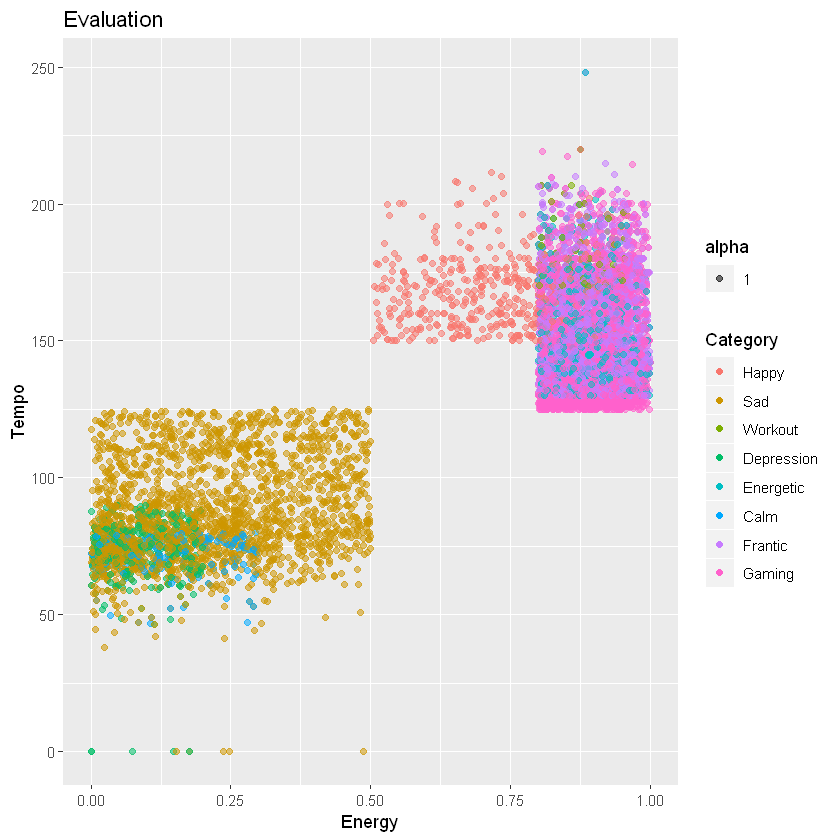

In [84]:

# To see the co-relation between attributes
Jagab <- Final_DB[sample(nrow(Final_DB), 10000), ]
p<- ggplot(data=Jagab) +
geom_point(aes(x=Energy,y=Tempo,color=Category,alpha = 1))
p+ ggtitle("Evaluation") + xlab("Energy") + ylab("Tempo")

In [85]:
#library(class)
#df_split=0.8
#index <- sample(1:nrow(Songs_Seg), df_split*nrow(Songs_Seg))
#df_train <- Songs_Seg[index,]
#dim(df_train)
#df_test <- Songs_Seg[-index,]
#dim(df_test)

#train_y <- df_train$Genre
#test_y <- df_test$Genre

#df_train_x <- df_train[,c(-1,-2,-7,-8,-9)]
#df_test_x <- df_test[,c(-1,-2,-7,-8,-9)]

#dim(df_train_x)
#dim(df_test_x)


#Final_DB_Pred_Test <- knn(train = df_train_x,test = df_test_x,cl=train_y,k=3)
#Final_DB_Pred_Test

#ab <- table(Final_DB_Pred_Test,test_y)
#max.print(ab)